<a href="https://colab.research.google.com/github/IagoAlmeida-ias/Python-para-Data-Science/blob/main/Des_Arvore_BomPagadoripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pacotes de Preparação de Dados

import pandas as pd
import numpy as np

# Pacotes Gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem Estatistica

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Módulo Anáse Exploratória -- Análise I.V (Information Value)

import aed

In [ ]:
# importação da base de dados

df = pd.read_csv('base_bom_pagador.csv')

In [ ]:
# Primeiras 5 linhas

df.head()

,Bom_Pagador,Renda_Mensal,Idade,Estado_Civil,Possui_Cartao_Credito,Escolaridade,Tempo_Emprego,Qtd_Filhos,Score_Credito,Historico_Inadimplencia,Utiliza_Limite_Cartao,Valor_Emprestimos,Tipo_Residencia,Trabalha_Formalmente
0,Sim,1688,21,Solteiro,Não,Pós-graduação,0,5,429,Nunca,97,40613,Financiada,Sim
1,Sim,12645,32,Viúvo,Não,Pós-graduação,19,4,580,Nunca,69,44769,Própria,Sim
2,Sim,13308,22,Solteiro,Não,Fundamental,4,2,346,Nunca,48,15783,Alugada,Sim
3,Sim,3376,20,Solteiro,Sim,Médio,7,2,355,Nunca,58,32615,Financiada,Sim
4,Não,12669,39,Divorciado,Não,Fundamental,4,1,866,Nunca,41,38217,Alugada,Sim


In [ ]:
# Ultimas 5 linhas

df.tail()

,Bom_Pagador,Renda_Mensal,Idade,Estado_Civil,Possui_Cartao_Credito,Escolaridade,Tempo_Emprego,Qtd_Filhos,Score_Credito,Historico_Inadimplencia,Utiliza_Limite_Cartao,Valor_Emprestimos,Tipo_Residencia,Trabalha_Formalmente
95,Sim,5108,21,Viúvo,Não,Pós-graduação,17,1,469,1 vez,21,16840,Alugada,Sim
96,Não,1617,55,Solteiro,Sim,Superior,24,2,614,2 ou mais,22,31578,Própria,Sim
97,Sim,2663,48,Divorciado,Sim,Pós-graduação,15,0,909,Nunca,10,19342,Alugada,Sim
98,Não,13097,50,Casado,Não,Pós-graduação,14,5,882,Nunca,78,48926,Alugada,Sim
99,Não,11839,51,Viúvo,Sim,Fundamental,13,4,595,Nunca,48,22198,Própria,Sim


In [ ]:
# informações do DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bom_Pagador              100 non-null    object
 1   Renda_Mensal             100 non-null    int64 
 2   Idade                    100 non-null    int64 
 3   Estado_Civil             100 non-null    object
 4   Possui_Cartao_Credito    100 non-null    object
 5   Escolaridade             100 non-null    object
 6   Tempo_Emprego            100 non-null    int64 
 7   Qtd_Filhos               100 non-null    int64 
 8   Score_Credito            100 non-null    int64 
 9   Historico_Inadimplencia  100 non-null    object
 10  Utiliza_Limite_Cartao    100 non-null    int64 
 11  Valor_Emprestimos        100 non-null    int64 
 12  Tipo_Residencia          100 non-null    object
 13  Trabalha_Formalmente     100 non-null    object
dtypes: int64(7), object(7)
memory usage: 11.1+ 

In [ ]:
# Qt Linhas e colunas

df.shape

(100, 14)

In [ ]:
# verificando Duplicadas

df.duplicated().sum()

np.int64(0)

In [ ]:
# descrição do DF

df.describe().round()

,Renda_Mensal,Idade,Tempo_Emprego,Qtd_Filhos,Score_Credito,Utiliza_Limite_Cartao,Valor_Emprestimos
count,100.0,100.0,100.0,100.0,100.0,100.0,100.0
mean,8308.0,40.0,16.0,3.0,636.0,51.0,26713.0
std,4034.0,14.0,9.0,2.0,207.0,29.0,14118.0
min,1509.0,18.0,0.0,0.0,302.0,1.0,530.0
25%,4786.0,28.0,9.0,1.0,452.0,24.0,16238.0
50%,8787.0,42.0,18.0,2.0,596.0,50.0,25575.0
75%,11871.0,51.0,23.0,4.0,840.0,79.0,39991.0
max,14869.0,65.0,30.0,5.0,977.0,100.0,49517.0


In [ ]:
df.describe(include=object).round()

,Bom_Pagador,Estado_Civil,Possui_Cartao_Credito,Escolaridade,Historico_Inadimplencia,Tipo_Residencia,Trabalha_Formalmente
count,100,100,100,100,100,100,100
unique,2,4,2,4,3,3,2
top,Sim,Viúvo,Sim,Superior,Nunca,Própria,Sim
freq,74,31,53,27,65,36,84


In [ ]:
# Verificando missing values

df.isnull().sum()

,0
Bom_Pagador,0
Renda_Mensal,0
Idade,0
Estado_Civil,0
Possui_Cartao_Credito,0
Escolaridade,0
Tempo_Emprego,0
Qtd_Filhos,0
Score_Credito,0
Historico_Inadimplencia,0


In [ ]:
# Alterando nome das colunas

colunas = ['bom_pagador', 'renda_mensal', 'idade', 'estado_civil',
       'possui_cartao_credito', 'escolaridade', 'tempo_emprego', 'qtd_filhos',
       'score_credito', 'historico_inadimplencia', 'utiliza_limite_cartao',
       'valor_emprestimos', 'tipo_residencia', 'trabalha_formalmente']

df.columns = colunas

In [ ]:
# Quem Não é bom pagador

df.query("bom_pagador == 'Não'")

,bom_pagador,renda_mensal,idade,estado_civil,possui_cartao_credito,escolaridade,tempo_emprego,qtd_filhos,score_credito,historico_inadimplencia,utiliza_limite_cartao,valor_emprestimos,tipo_residencia,trabalha_formalmente
4,Não,12669,39,Divorciado,Não,Fundamental,4,1,866,Nunca,41,38217,Alugada,Sim
6,Não,13802,50,Solteiro,Não,Superior,21,2,429,Nunca,89,15216,Financiada,Não
18,Não,13291,33,Solteiro,Não,Superior,19,1,352,1 vez,48,10353,Própria,Sim
20,Não,9701,44,Divorciado,Não,Pós-graduação,23,1,789,1 vez,84,28949,Financiada,Sim
24,Não,3243,60,Solteiro,Não,Médio,26,2,803,Nunca,4,41873,Alugada,Sim
28,Não,9817,44,Solteiro,Não,Pós-graduação,3,4,354,2 ou mais,42,29939,Própria,Sim
30,Não,4758,64,Casado,Sim,Superior,0,4,452,Nunca,56,13055,Própria,Sim
31,Não,4004,21,Viúvo,Sim,Médio,29,1,876,Nunca,12,25211,Alugada,Sim
33,Não,13992,59,Viúvo,Sim,Médio,18,1,387,Nunca,58,6989,Alugada,Sim
36,Não,14257,21,Viúvo,Sim,Superior,30,3,871,1 vez,18,37481,Alugada,Não


In [ ]:
df.query("score_credito > 600 and bom_pagador == 'Não'")

,bom_pagador,renda_mensal,idade,estado_civil,possui_cartao_credito,escolaridade,tempo_emprego,qtd_filhos,score_credito,historico_inadimplencia,utiliza_limite_cartao,valor_emprestimos,tipo_residencia,trabalha_formalmente
4,Não,12669,39,Divorciado,Não,Fundamental,4,1,866,Nunca,41,38217,Alugada,Sim
20,Não,9701,44,Divorciado,Não,Pós-graduação,23,1,789,1 vez,84,28949,Financiada,Sim
24,Não,3243,60,Solteiro,Não,Médio,26,2,803,Nunca,4,41873,Alugada,Sim
31,Não,4004,21,Viúvo,Sim,Médio,29,1,876,Nunca,12,25211,Alugada,Sim
36,Não,14257,21,Viúvo,Sim,Superior,30,3,871,1 vez,18,37481,Alugada,Não
38,Não,1509,64,Divorciado,Sim,Fundamental,12,1,920,1 vez,83,37670,Própria,Não
40,Não,6810,24,Divorciado,Sim,Superior,22,3,933,Nunca,9,45827,Financiada,Sim
53,Não,13491,46,Solteiro,Sim,Fundamental,21,5,924,Nunca,48,32553,Própria,Sim
64,Não,10507,49,Divorciado,Sim,Médio,21,2,865,Nunca,80,49517,Financiada,Sim
71,Não,10335,18,Viúvo,Sim,Fundamental,27,0,781,1 vez,12,41121,Financiada,Sim


In [ ]:
df.query("score_credito < 400 and bom_pagador == 'Sim'")

,bom_pagador,renda_mensal,idade,estado_civil,possui_cartao_credito,escolaridade,tempo_emprego,qtd_filhos,score_credito,historico_inadimplencia,utiliza_limite_cartao,valor_emprestimos,tipo_residencia,trabalha_formalmente
2,Sim,13308,22,Solteiro,Não,Fundamental,4,2,346,Nunca,48,15783,Alugada,Sim
3,Sim,3376,20,Solteiro,Sim,Médio,7,2,355,Nunca,58,32615,Financiada,Sim
10,Sim,7073,49,Divorciado,Sim,Médio,6,4,312,1 vez,29,30118,Alugada,Sim
22,Sim,4427,24,Casado,Não,Pós-graduação,3,2,366,Nunca,19,38507,Própria,Sim
25,Sim,11744,45,Casado,Sim,Médio,5,4,375,2 ou mais,16,27807,Própria,Sim
52,Sim,2903,22,Divorciado,Não,Médio,27,2,361,Nunca,68,48835,Alugada,Sim
67,Sim,10145,43,Divorciado,Sim,Superior,16,2,302,Nunca,29,44620,Própria,Sim
73,Sim,13459,34,Divorciado,Sim,Fundamental,26,1,333,2 ou mais,81,2583,Alugada,Sim
78,Sim,8037,64,Casado,Sim,Fundamental,11,5,372,Nunca,88,23911,Alugada,Sim
93,Sim,5270,38,Viúvo,Não,Médio,25,1,373,1 vez,87,17860,Alugada,Sim


In [ ]:
df.groupby(['trabalha_formalmente','tipo_residencia'])['score_credito'].mean().round()

trabalha_formalmente  tipo_residencia
Não                   Alugada            614.0
                      Financiada         578.0
                      Própria            818.0
Sim                   Alugada            596.0
                      Financiada         663.0
                      Própria            627.0
Name: score_credito, dtype: float64

In [ ]:
df.groupby('estado_civil')[['qtd_filhos','valor_emprestimos']].mean().round()

,qtd_filhos,valor_emprestimos
estado_civil,,
Casado,4.0,25454.0
Divorciado,2.0,30562.0
Solteiro,3.0,26998.0
Viúvo,2.0,24332.0


In [ ]:
df.groupby(['bom_pagador','possui_cartao_credito'])['utiliza_limite_cartao'].mean().round()

bom_pagador  possui_cartao_credito
Não          Não                      49.0
             Sim                      51.0
Sim          Não                      51.0
             Sim                      51.0
Name: utiliza_limite_cartao, dtype: float64

In [ ]:
df.groupby(['bom_pagador','escolaridade'])['idade'].mean().round()

bom_pagador  escolaridade 
Não          Fundamental      44.0
             Médio            43.0
             Pós-graduação    49.0
             Superior         39.0
Sim          Fundamental      43.0
             Médio            41.0
             Pós-graduação    34.0
             Superior         38.0
Name: idade, dtype: float64

In [ ]:
df.groupby(['bom_pagador','estado_civil'])['renda_mensal'].mean().round()

bom_pagador  estado_civil
Não          Casado           6405.0
             Divorciado       8239.0
             Solteiro         9802.0
             Viúvo           10933.0
Sim          Casado           7406.0
             Divorciado       7162.0
             Solteiro         7206.0
             Viúvo            9565.0
Name: renda_mensal, dtype: float64

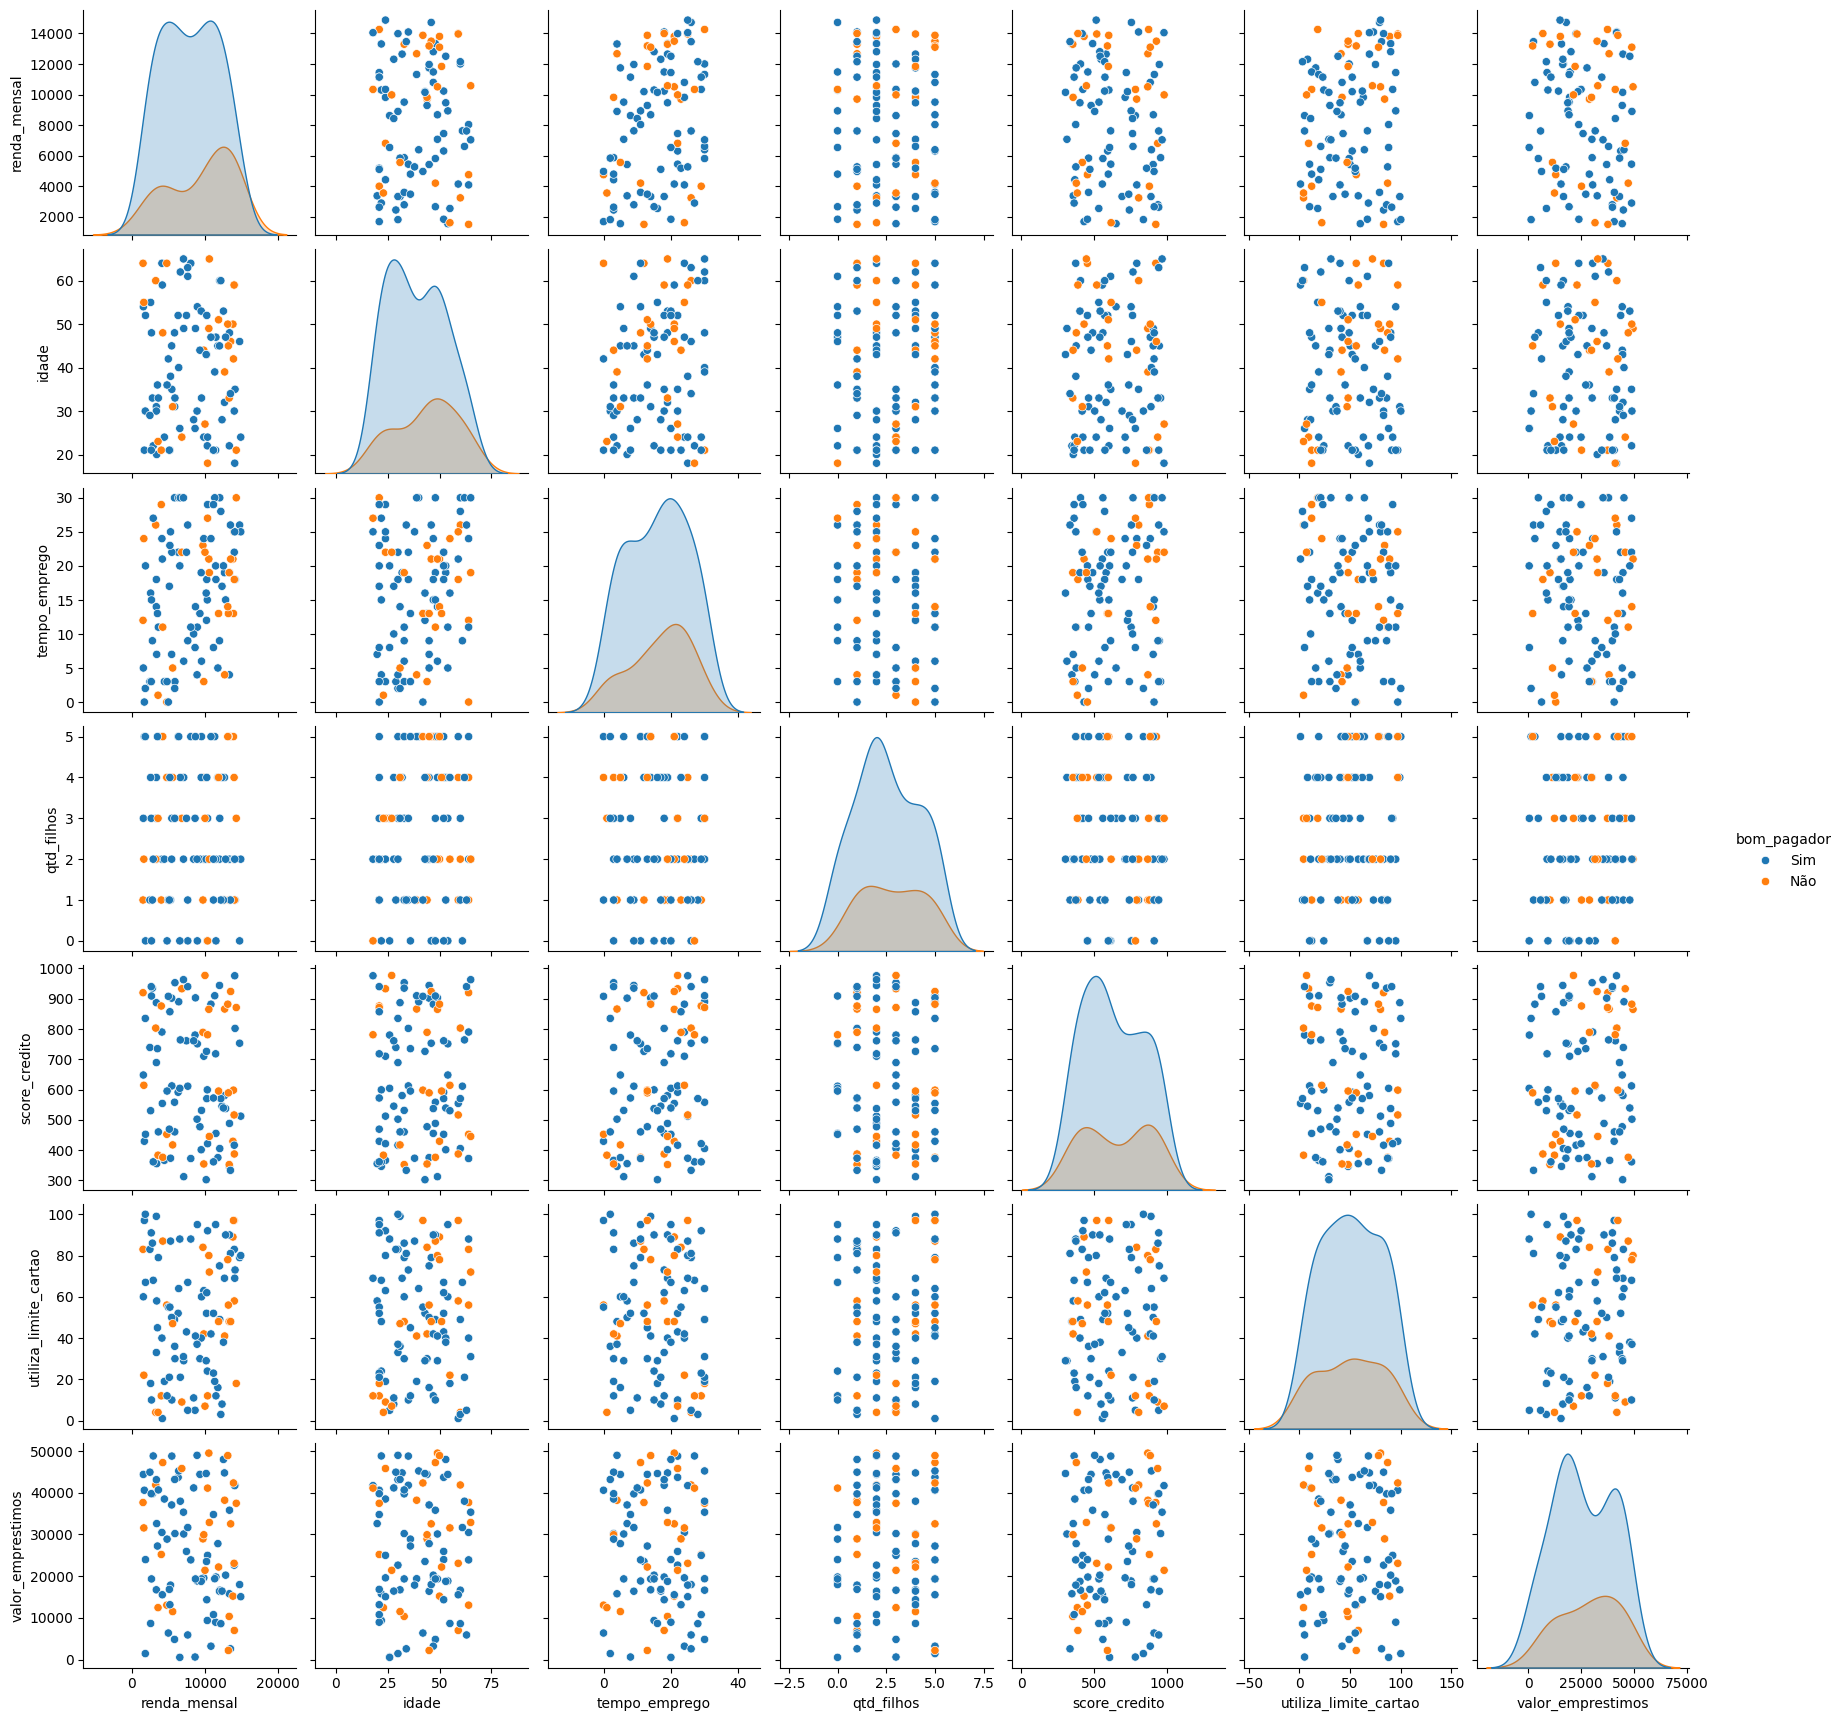

In [ ]:
sns.pairplot(df, hue='bom_pagador')

In [ ]:
df_fun = df.groupby('estado_civil')["valor_emprestimos"].sum().sort_values(ascending=True)

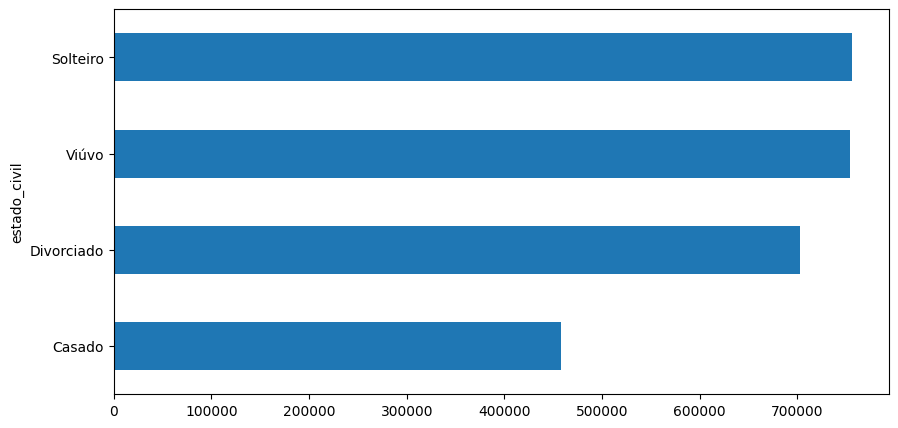

In [ ]:
df_fun.plot(kind='barh',figsize=(10,5));

In [ ]:
df_e = df.groupby('escolaridade')['valor_emprestimos'].sum().sort_values(ascending=False)

<Axes: xlabel='escolaridade'>

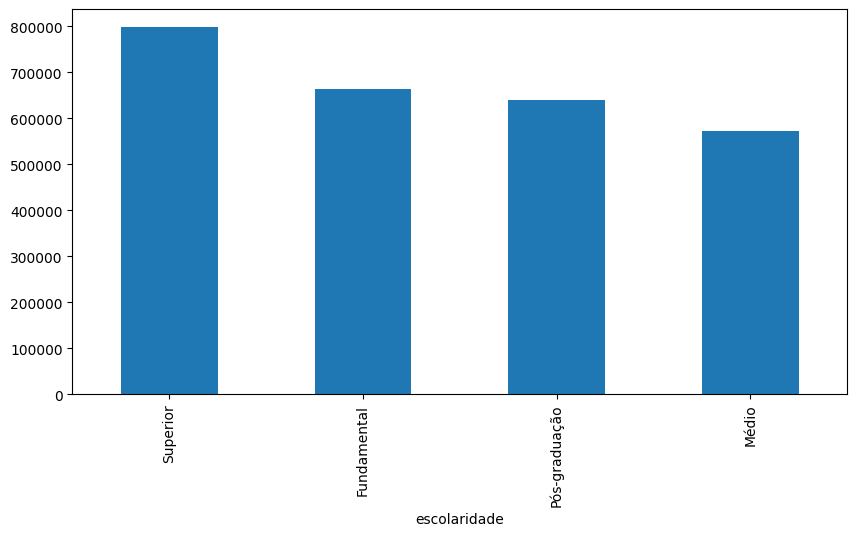

In [ ]:
df_e.plot(kind='bar', figsize=(10,5))

In [ ]:
df_i = df.groupby('qtd_filhos')['valor_emprestimos'].sum()

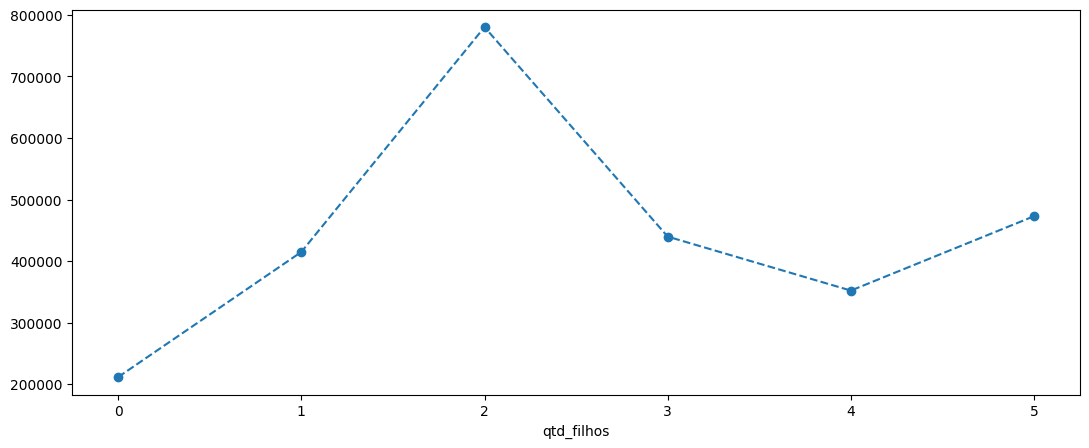

In [ ]:
df_i.plot(kind='line', figsize=(13,5), linestyle='--', marker='o');

In [ ]:
df_ren = df.groupby('tipo_residencia')['renda_mensal'].sum()

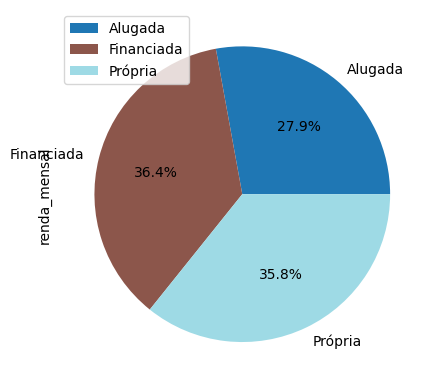

In [ ]:
df_ren.plot.pie(autopct='%1.1f%%', cmap='tab20', legend=True,);

In [ ]:
# Information Value

df['target'] = np.where(df['bom_pagador'] == 'Sim', 1, 0)

In [ ]:
def remover_outliers_iqr(df, coluna):
    Q1 = df[['valor_emprestimos','utiliza_limite_cartao']].quantile(0.25)
    Q3 = df[['valor_emprestimos','utiliza_limite_cartao']].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[['valor_emprestimos','utiliza_limite_cartao']] >= limite_inferior) & (df[['valor_emprestimos','utiliza_limite_cartao']] <= limite_superior)]

# Aplica nas duas colunas
df_limpo = remover_outliers_iqr(df, 'valor_emprestimos')
df_limpo = remover_outliers_iqr(df_limpo, 'utiliza_limite_cartao')

In [ ]:
df_Bp = aed.analise_iv(df, 'target')
df_Bp.get_lista_iv()

/content/aed.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to

target,IV
Variavel,
bom_pagador,9.21
valor_emprestimos,1.30
utiliza_limite_cartao,1.19
renda_mensal,0.58
tempo_emprego,0.57
score_credito,0.55
idade,0.20
qtd_filhos,0.19
historico_inadimplencia,0.05


In [ ]:
# Criação das variáveis dummies

df_rh_mod = pd.get_dummies(df)
df_rh_mod.head()

,renda_mensal,idade,tempo_emprego,qtd_filhos,score_credito,utiliza_limite_cartao,valor_emprestimos,target,bom_pagador_Não,bom_pagador_Sim,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Solteiro,estado_civil_Viúvo,possui_cartao_credito_Não,possui_cartao_credito_Sim,escolaridade_Fundamental,escolaridade_Médio,escolaridade_Pós-graduação,escolaridade_Superior,historico_inadimplencia_1 vez,historico_inadimplencia_2 ou mais,historico_inadimplencia_Nunca,tipo_residencia_Alugada,tipo_residencia_Financiada,tipo_residencia_Própria,trabalha_formalmente_Não,trabalha_formalmente_Sim
0,1688,21,0,5,429,97,40613,1,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True
1,12645,32,19,4,580,69,44769,1,False,True,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False,True
2,13308,22,4,2,346,48,15783,1,False,True,False,False,True,False,True,False,True,False,False,False,False,False,True,True,False,False,False,True
3,3376,20,7,2,355,58,32615,1,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True
4,12669,39,4,1,866,41,38217,0,True,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,True


In [ ]:
# Target (Variável Resposta/Dependente)

y = df_rh_mod['target']

# Features (Variavel Explicativa/Independentes)

x = df_rh_mod.drop(['target',
                    'bom_pagador_Não',
                    'bom_pagador_Sim'],
                   axis=1)

In [ ]:
# Ajuste do Modelo

modelo = DecisionTreeClassifier(max_depth=3,random_state=42)
modelo.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

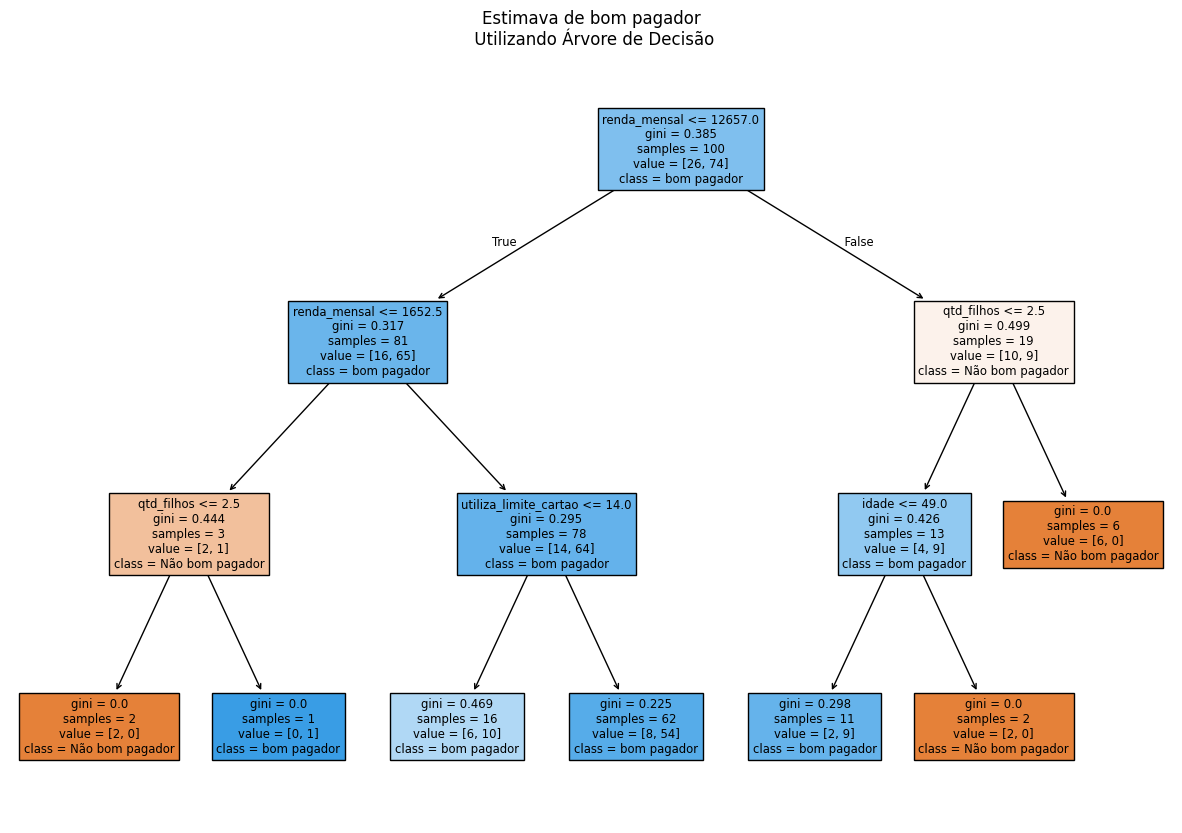

In [ ]:
# Interpretação do Modelo

plt.figure(figsize=(15,10))
tree.plot_tree(modelo,
               feature_names=x.columns,
               class_names=['Não bom pagador','bom pagador'],
               filled=True);
plt.title('Estimava de bom pagador\n Utilizando Árvore de Decisão');